`load_iris` 是 Scikit-learn 库中一个经典的机器学习数据集加载函数，它用于加载鸢尾花数据集（Iris Dataset）。这个数据集是机器学习和数据挖掘领域最常用的数据集之一，常用于分类算法的测试和演示。以下是对这个数据集的详细介绍：

鸢尾花数据集包含150条记录，每条记录代表一朵鸢尾花。数据集中有四个特征和一个目标变量。具体如下：

特征（Features）
1. **花萼长度（sepal length）**：单位为厘米
2. **花萼宽度（sepal width）**：单位为厘米
3. **花瓣长度（petal length）**：单位为厘米
4. **花瓣宽度（petal width）**：单位为厘米

目标变量（Target）
鸢尾花数据集中的目标变量有三个类别，分别代表三种不同的鸢尾花种类：
1. **Setosa**
2. **Versicolor**
3. **Virginica**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# 加载数据集
iris = load_iris()
# 将数据转换为 DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# 将数值标签转换为类别名称
df['species'] = df['species'].map({i: iris.target_names[i] for i in range(3)})

# 数据集基本信息
print(df.info())

# 描述性统计
print(df.describe())

# 显示前几行数据
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

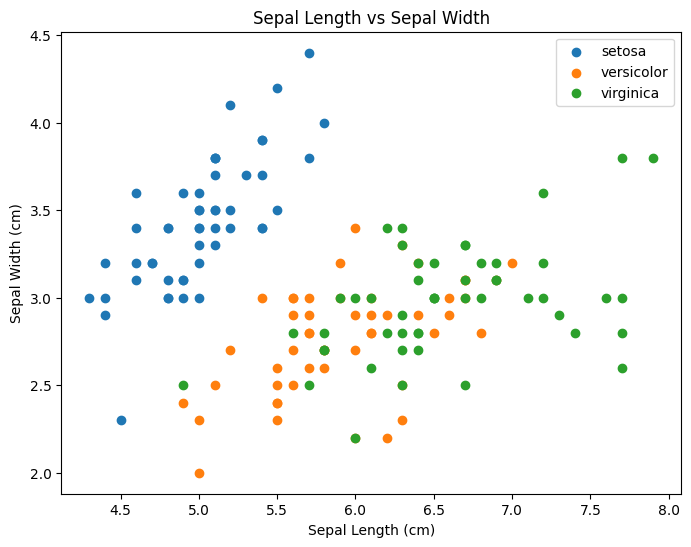

In [2]:
import matplotlib.pyplot as plt

# 绘制两个特征的散点图
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Length vs Sepal Width')
plt.show()


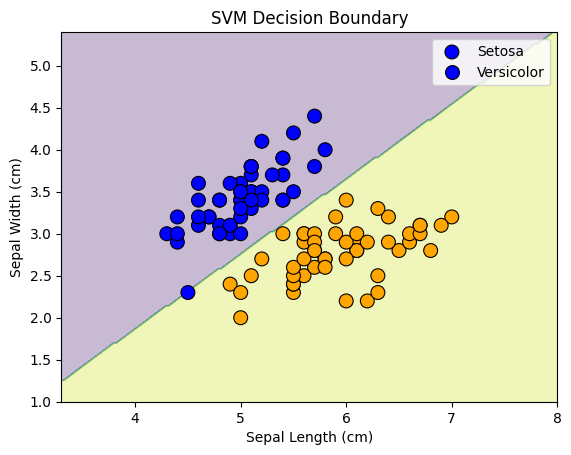

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# 筛选 Setosa 和 Versicolor 数据
df = df[df['species'] != 2]  # 去掉 Virginica
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor'})

# 提取特征和标签
X = df[['sepal length (cm)', 'sepal width (cm)']].values
y = df['species'].map({'Setosa': 0, 'Versicolor': 1}).values

# 标准化数据并训练 SVM
svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm.fit(X, y)

# 定义绘制决策边界的函数
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['species'], palette=['blue', 'orange'], s=100, edgecolor='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary')
    plt.legend(['Setosa', 'Versicolor'])
    plt.show()

# 绘制决策边界
plot_decision_boundary(svm, X, y)
